In [18]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

In [19]:
col_names = ['month', 'KY_CD', 'cnt']
df = pd.read_csv('month_valid.csv', header=None, names=col_names, dtype=int)

In [20]:
ttl = df.groupby(df.month).sum().cnt.values
month = range(1, 13)
month_name = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
pool = [341, 578, 344, 351, 109, 235]
pool_desc = ['Petit Larceny', 'Harrassment 2', 'Assault 3', 'Criminal Mischief', 'Grand Larceny', 'Dangerous Drugs']
df_top6 = df[df.KY_CD.isin(pool)]

lst = []
for i in pool:
    lst.append(df_top6[df_top6.KY_CD==i].cnt.values)

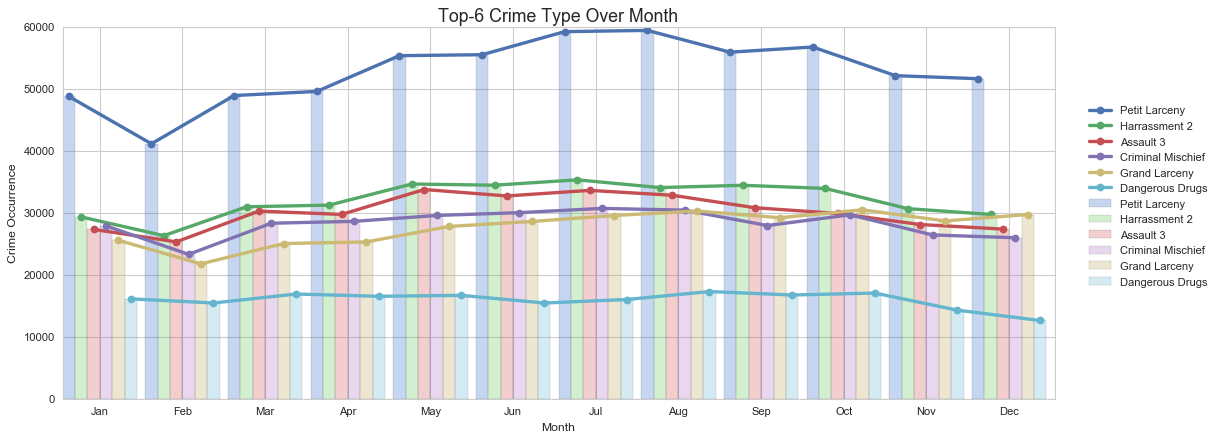

In [26]:
# bar plot
plt.figure(figsize=(16, 6))
c = sns.color_palette("muted", 6)
c2 = sns.color_palette("deep", 6)

N = len(month)
ind = np.arange(N)
w = 0.15

for i in range(6):
    plt.bar(ind+w*i, lst[i], w, color=c[i], label=pool_desc[i], alpha=0.3)
for i in range(6):
    plt.plot(ind+w*(i+.5), lst[i], "o-", color=c2[i], label=pool_desc[i], linewidth=3)

plt.xlabel('Month')
plt.ylabel('Crime Occurrence')
plt.title('Top-6 Crime Type Over Month', fontsize=16)
plt.xticks(ind+3*w, month_name)
lgd = plt.legend(bbox_to_anchor=(1.03, 0.8), loc=2, borderaxespad=0.)
plt.savefig('kycd_month_bar.png', bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

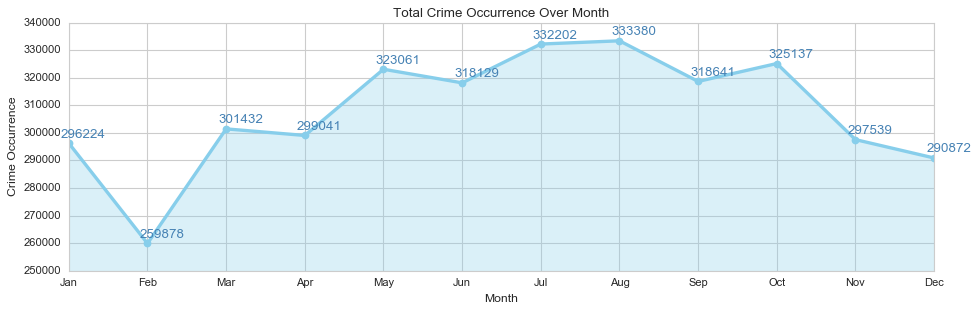

In [25]:
plt.figure(figsize=(12, 4))
plt.plot(month, ttl, "o-", linewidth=3, fillstyle='full', color='skyblue')
plt.xticks(month, month_name)
plt.title('Total Crime Occurrence Over Month')
plt.xlabel('Month')
plt.ylabel('Crime Occurrence')
for i in range(len(ttl)):
    plt.text(month[i]-0.1, ttl[i]+2000, str(ttl[i]), fontsize=12, color='steelblue')
plt.fill_between(month, ttl, 250000, alpha=0.3, color='skyblue')
plt.tight_layout()
plt.savefig('ttl_month.png')
plt.show()

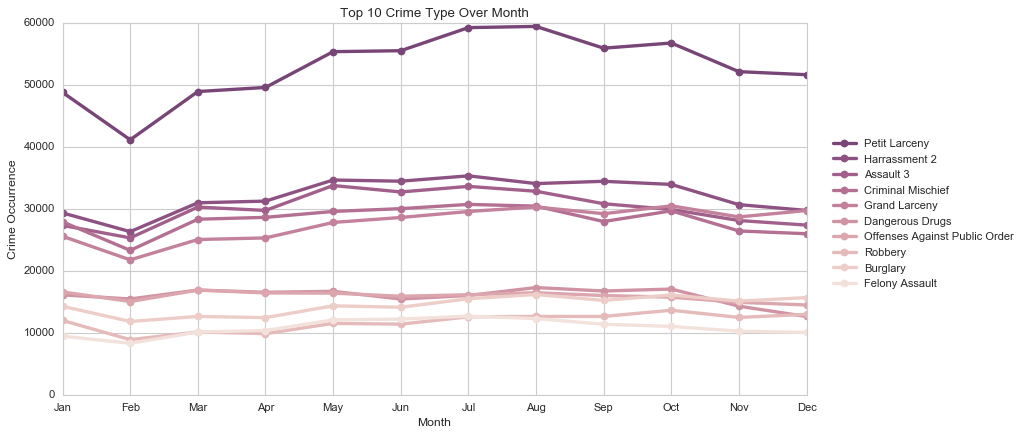

In [23]:
pool_10 = [341, 578, 344, 351, 109, 235, 361, 105, 107, 106]
pool_desc_10 = ['Petit Larceny', 'Harrassment 2', 'Assault 3', 'Criminal Mischief', 'Grand Larceny', 'Dangerous Drugs',
               'Offenses Against Public Order', 'Robbery', 'Burglary', 'Felony Assault']
df_tops_10 = df[df.KY_CD.isin(pool_10)]

lst = []
for i in pool_10:
    lst.append(df_tops_10[df_tops_10.KY_CD==i].cnt.values)

plt.figure(figsize=(12, 6))
c3 = sns.cubehelix_palette(10, dark=0.35, light=0.9, reverse=True)
for i in range(10):
    plt.plot(month, lst[i], "o-", label=pool_desc_10[i], color=c3[i], linewidth=3)

plt.title('Top 10 Crime Type Over Month')
plt.xlim(1)
plt.xticks(month, month_name)
plt.xlabel('Month')
plt.ylabel('Crime Occurrence')
lgd = plt.legend(bbox_to_anchor=(1.03, 0.7), loc=2, borderaxespad=0.)
plt.savefig('kycd_month_line.png', bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

In [7]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')
